# Chap3 from the book: 'L'apprentissage profond avec Pyhton', François CHOLLET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

# Data processing

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean

In [5]:
std = train_data.std(axis=0)
train_data /= std

In [6]:
test_data -= mean
test_data /= std

# Model

In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    loss='mse',
    metrics=['mae'],
    optimizer='rmsprop'
)

In [19]:
# K folds
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_mae_history = []

for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)

    history = model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        validation_data=(val_data, val_targets)
    )
    mae_history = history.history['val_mean_absolute_error']
    all_mae_history.append(mae_history)



processing fold # 0
Epoch 1/500
10/10 [==============================] - 0s 8ms/step - loss: 1.2637 - mae: 0.8196 - val_loss: 1.3792 - val_mae: 0.8777
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 1.3646 - mae: 0.8490 - val_loss: 0.6205 - val_mae: 0.5657
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 1.3426 - mae: 0.8523 - val_loss: 0.6988 - val_mae: 0.6572
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 1.1251 - mae: 0.7499 - val_loss: 0.7191 - val_mae: 0.6666
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 1.1840 - mae: 0.8263 - val_loss: 0.8138 - val_mae: 0.7346
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 1.0164 - mae: 0.7484 - val_loss: 0.7195 - val_mae: 0.6375
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 1.1975 - mae: 0.8297 - val_loss: 0.7419 - val_mae: 0.6688
Epoch 8/500
10/10 [==============================] - 0s 5ms/ste

In [21]:
average_mae_history = [np.mean(x[i] for x in all_mae_history) for i in range(num_epochs)]

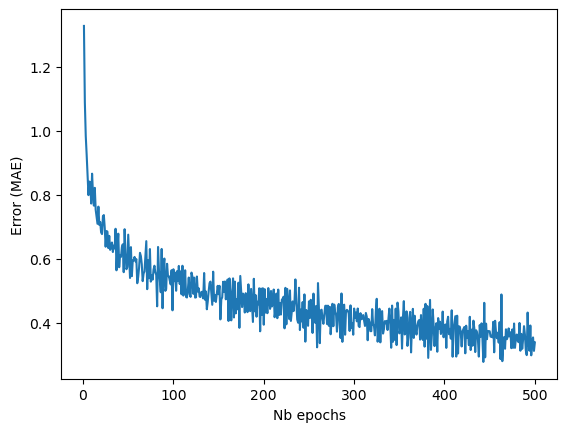

In [22]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Nb epochs')
plt.ylabel('Error (MAE)')
plt.show()

In [23]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

Text(0, 0.5, 'Error (MAE)')

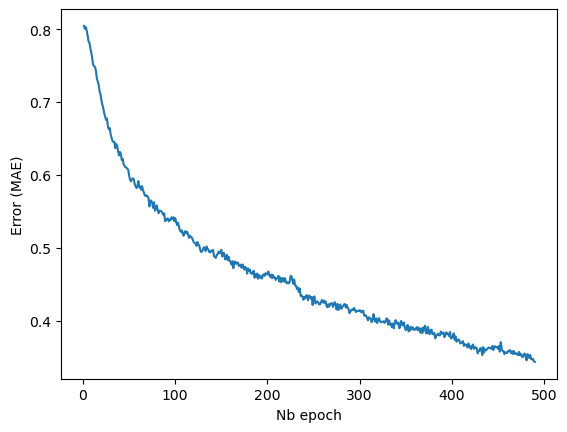

In [24]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Nb epoch')
plt.ylabel('Error (MAE)')

In [ ]:
model.fit(
    train_data,
    train_targets,
    epochs=80,
    batch_size=16,
    verbose=0
)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score